In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

In [54]:
# XGBOOST
MAX_ROUNDS = 2000
EARLY_STOP = 300
OPT_ROUNDS = 2000
VERBOSE_EVAL = 30

RANDOM_STATE = 1000

In [55]:
train_df = pd.read_csv('C:/Users/N1110/Desktop/CaseStudy2-dataPYTHON.csv')
val_df = pd.read_csv('C:/Users/N1110/Desktop/CaseStudy2ValidationPYTHON.csv')

In [56]:
#train_df.shape

In [57]:
#val_df.head()

In [58]:
# Data Distribution
#train_df.describe()

In [59]:
#import pandas_profiling
#pandas_profiling.ProfileReport(train_df)

In [60]:
#Prediction
target = 'AttritionInt'
predictors = ['OverTimeINT' ,'MaritalStatusINT' ,'JobInvolvement' , 'YearsInCurrentRole',  'MonthlyIncome','StockOptionLevel','Age' 
 ,  'EnvironmentSatisfaction'  , 'WorkLifeBalance' , 'JobSatisfaction'  , 'DepartmentINT'  , 'DistanceFromHome'  ,  'JobRoleINT' 
 , 'TrainingTimesLastYear' ,  'NumCompaniesWorked']

In [61]:
#val_df.shape

In [62]:
# XGBoost
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)
type(dtrain)

xgboost.core.DMatrix

In [63]:
# XGBoost Parameters
params = {}
params['objective'] = 'binary:logistic'
#params['objective'] = 'multi:softmax'
#params['objective'] = 'reg:linear'
params['eta'] = 0.05
params['silent'] = False
params['max_depth'] = 3
params['subsample'] = 0.4
params['colsample_bytree'] = 0.4
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

params['alpha'] = 0.001
params['gamma'] = 0
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [64]:
xgb_clf = xgb.train(params,
                   dtrain,
                   MAX_ROUNDS,
                   watchlist,
                   early_stopping_rounds = EARLY_STOP,
                   maximize = True,
                   verbose_eval = VERBOSE_EVAL)

[0]	train-auc:0.680068	valid-auc:0.670827
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 300 rounds.
[30]	train-auc:0.856543	valid-auc:0.838605
[60]	train-auc:0.87897	valid-auc:0.838361
[90]	train-auc:0.894245	valid-auc:0.838767
[120]	train-auc:0.909309	valid-auc:0.841369
[150]	train-auc:0.919357	valid-auc:0.847549
[180]	train-auc:0.926913	valid-auc:0.84828
[210]	train-auc:0.934643	valid-auc:0.84389
[240]	train-auc:0.941554	valid-auc:0.836572
[270]	train-auc:0.946261	valid-auc:0.83706
[300]	train-auc:0.950611	valid-auc:0.834539
[330]	train-auc:0.954397	valid-auc:0.833645
Stopping. Best iteration:
[46]	train-auc:0.870304	valid-auc:0.851533



In [65]:
preds = xgb_clf.predict(dvalid)
print('XGBoost - roc_auc_score: ', roc_auc_score(val_df[target].values, preds))

XGBoost - roc_auc_score:  0.8334823969428409


In [66]:
#fig, ax = plt.subplots(ncols = 1, figsize = (8, 5))
#xgb.plot_importance(xgb_clf, height = 0.5, title = 'Feature Importance - XGBoost', ax = ax, color = 'green')
#plt.show()

In [67]:
predsbin = preds > 0.5

In [68]:
confusion_matrix(val_df[target].values, predsbin)

array([[249,   2],
       [ 30,  19]], dtype=int64)

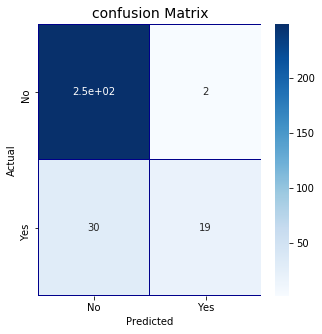

In [69]:
#PLOT Confusion Matrix

cm =pd.crosstab(val_df[target].values, predsbin, rownames = ['Actual'], colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], 
            annot = True, ax = ax1,
            linewidths = .2, linecolor = 'Darkblue', cmap ='Blues')
plt.title('confusion Matrix', fontsize = 14)
plt.show()

In [70]:
val_df['ID']

0      1171
1      1172
2      1173
3      1174
4      1175
5      1176
6      1177
7      1178
8      1179
9      1180
10     1181
11     1182
12     1183
13     1184
14     1185
15     1186
16     1187
17     1188
18     1189
19     1190
20     1191
21     1192
22     1193
23     1194
24     1195
25     1196
26     1197
27     1198
28     1199
29     1200
       ... 
270    1441
271    1442
272    1443
273    1444
274    1445
275    1446
276    1447
277    1448
278    1449
279    1450
280    1451
281    1452
282    1453
283    1454
284    1455
285    1456
286    1457
287    1458
288    1459
289    1460
290    1461
291    1462
292    1463
293    1464
294    1465
295    1466
296    1467
297    1468
298    1469
299    1470
Name: ID, Length: 300, dtype: int64

In [71]:
pred_df = pd.DataFrame({'Prediction' : predsbin})
output = val_df['ID'].join(pred_df['Prediction'])

AttributeError: 'Series' object has no attribute 'join'

In [72]:
val_df['Prediction'] = predsbin

In [73]:
df = val_df[['ID','Prediction']]

In [74]:
df

,ID,Prediction
0,1171,False
1,1172,False
2,1173,False
3,1174,False
4,1175,False
5,1176,False
6,1177,False
7,1178,False
8,1179,False
9,1180,True


In [75]:
export_csv =df.to_csv('C:/Users/N1110/Desktop/CaseStudy2-OutputPYTHON2.csv',index = False)

ModuleNotFoundError: No module named 'sklearn.externals.joblib.externals'